In [47]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#importing the data
data = pd.read_csv("gym_members_exercise_tracking.csv")
data = pd.DataFrame(data)
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [49]:
#describing the data
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [50]:
#data type of all atributes
data.dtypes

#NOTE: We do not need to clean the data because all of the data types are as expected. 
#      The only two objects are gender and workout_types which are strings. 

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

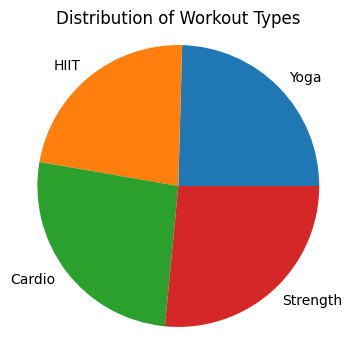

In [51]:
#Pie chart for most popular workout types
workout_types = {}
for x in data["Workout_Type"]:
    if x in workout_types.keys():
        workout_types[x] += 1
    else:
        workout_types[x] = 1

plt.figure(figsize=(4, 4))
labels = workout_types.keys()
plt.pie(workout_types.values(), labels=labels)
plt.title('Distribution of Workout Types')
plt.axis('equal')
plt.show()

**Notes:** For this prediction model, we will be defining a "successful workout" as one where there is a higher amount of calories burned per session. Because of this, strength and yoga data will be excluded from this prediction model. This is because the focus of these exercises is not directly on burning calories where as HIIT and Cardio are more aligned with that metric. For example, Yoga focuses on mindfulness, flexibility, and balance. Additionally strength training, while it can burn calories, also has other factors like your muscle growth and calories burned outside of your workout which are variables not represented by the data. 

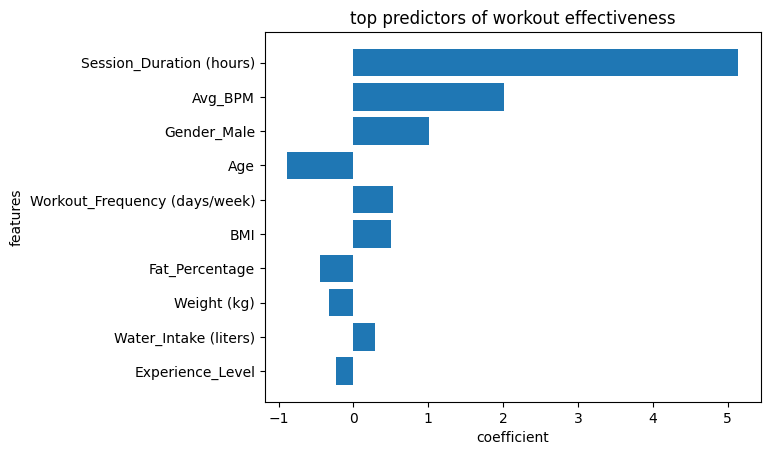

In [52]:
#Analyzing what variables were the most effective at predicting an effective workout.
ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical)
feature_names = np.concatenate([numeric, encoded_cat_names])
coefficients = model.named_steps['logreg'].coef_[0]
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Importance': np.abs(coefficients)}).sort_values(by='Importance', ascending=False)
top_features = importance_df.head(10)

#plotting
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.gca().invert_yaxis()
plt.xlabel('coefficient')
plt.ylabel('features')
plt.title('top predictors of workout effectiveness')
plt.show()

# Talking about the results:
- **Top predictors:** session duration in hours and average BPM (average intensity).
- **Gender Male:** the reason for this being a predictor of a more successful workout is not because men have more successful workouts but because men on average have more muscle mass and less body fat than women. According to mayo clinic, "Men usually have less body fat and more muscle than do women of the same age and weight. That means men burn more calories" (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/metabolism/art-20046508)
- **Workout Frequency, BMI, and water intake:** All of these features showed some correlation to a successful workout.
- **Negative coefficient:** Age, fat percentage, weight, and experience level all play no impact in predicting a successful workout. This shows that there are no restrictions or barriers to completing a successful workout. 

In [53]:
new_df = data[(data["Workout_Type"] == "HIIT") | (data["Workout_Type"] == "Cardio")]

#OpenAI ChatGPT-5. Accessed on November 1st, 2025 https://chatgpt.com/. 
# Prompt chain:{'Create a logistic regression model to predict the effectiveness of ones workout with the following data. I am using calories burned to indicate a good workout.'}
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Define target variable: Effective if Calories_Burned ≥ median
pd.options.mode.chained_assignment = None
threshold = new_df['Calories_Burned'].median()
new_df['Effective'] = (new_df['Calories_Burned'] >= threshold).astype(int)

# Features and target
X = new_df.drop(['Calories_Burned', 'Effective'], axis=1)
y = new_df['Effective']

# Identify categorical and numeric columns
categorical = ['Gender', 'Workout_Type']
numeric = X.columns.difference(categorical)

# Preprocessing
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Model pipeline
model = Pipeline([
    ('preprocess', preprocess),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.91      0.96      0.93        45

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96

[[47  4]
 [ 2 43]]


In [57]:
#Demonstration of the model in action
my_good_workout = pd.DataFrame({'Age': [19],'Gender': ['Female'],'Weight (kg)': [75],'Height (m)': [1.78],'Max_BPM': [200],'Avg_BPM': [180],'Resting_BPM': [77],'Session_Duration (hours)': [1.2],
                           'Workout_Type': ['Cardio'],'Fat_Percentage': [25.0],'Water_Intake (liters)': [0.5],'Workout_Frequency (days/week)': [5],'Experience_Level': [2],'BMI': [23.7]})
#A typical workout for me
pred_good_class = model.predict(my_good_workout)
print("Predicted Effective Workout:", "Yes" if pred_good_class[0] == 1 else "No")


#reduced time 1 hour and decreased the intensity/average bpm to make the workout worse according to the values that will make a workout worse. 
my_bad_workout = pd.DataFrame({'Age': [19],'Gender': ['Female'],'Weight (kg)': [75],'Height (m)': [1.78],'Max_BPM': [180],'Avg_BPM': [120],'Resting_BPM': [77],'Session_Duration (hours)': [0.2],
                           'Workout_Type': ['Cardio'],'Fat_Percentage': [25.0],'Water_Intake (liters)': [0.5],'Workout_Frequency (days/week)': [5],'Experience_Level': [2],'BMI': [23.7]})
pred_bad_class = model.predict(my_bad_workout)
print("Predicted In-Effective Workout:", "Yes" if pred_bad_class[0] == 1 else "No")


Predicted Effective Workout: Yes
Predicted In-Effective Workout: No
